# __Main Code__

In [5]:
import pandas as pd

In [73]:
# Richard Tobing 862219395


# Task List:
    # [x] Misplaced Tiles heuristic: number of misplaced tiles
    # [x] Manhattan heuristic: the number of moves each misplaced tile needs to take to get to the correct placement
    # [x]  MAKE-QUEUE: takes in the initial state, and returnsn the frontier
        # [x] simple movement 
        # [x] corners 
        # [x] sides and center
    # [x] Misplaced queueing function at depth <=8
    # [x] Mahtattan queueing function
    # [x] UCS queueing function
    # [x] REMOVE_FRONT(nodes): chooses one node from the frontier to process
    # [x] Uniform Cost Search: essentially equivalent to BFS since all moves only cost 1, basically a move counter
    # [x] skip repeated states

    # [] user input
    # [] Problem obj: has OPERATORS, GOAL_TEST(), and INITIAL_STATE as fields
    # [] traceback printing
    # [x] Report
        #[] easy sample trace
        #[] easy hard trace


    #[x] optimize expandNode
    #[] add good comments
    #[] find brown m&ms



# -----these are sample problems taken from Dr. Keogh's slides/prompt:-----
# 3 misplaced, 8 manhattan:
sample=    [[3,2,8],
            [4,5,6],
            [7,1,0]]
mySample=  [[6,6,6],
            [6,6,6],
            [6,6,0]]
sampleD4=  [[1,2,3],
            [5,0,6],
            [4,7,8]]
sample2=   [[1,2,3],
            [4,5,8],
            [6,7,0]]
sampleD2=  [[1,2,3],
            [4,5,6],
            [0,7,8]]
sampleD0=  [[1,2,3],
            [4,5,6],
            [7,8,0]]
sampleD8=  [[1,3,6],
            [5,0,2],
            [4,7,8]]
sampleD12=  [[1,3,6],
             [5,0,7],
             [4,8,2]]
sampleD16=  [[1,6,7],
             [5,0,3],
             [4,8,2]]
sampleD20=  [[7,1,2],
             [4,8,5],
             [6,3,0]]
sampleD24=  [[0,7,2],
             [4,6,1],
             [3,5,8]]
sampleD31=  [[8,6,7],
             [2,5,4],
             [3,0,1]]
#-----------------------------------------------------------------///
            
#----problem proto-Object-------
initState= sampleD2
dim= len(initState[0])
squize= dim*dim
globalminima= squize
stateBuffer= []
#----------------------------

def printNode(matrix):
    for row in matrix:
        print(row)
    print("---------\n")

def operation(node,y,x,yShift,xShift):
    repeat= False
    swap= node[y+yShift][x+xShift]
    node[y+yShift][x+xShift]= 0
    node[y][x]= swap
    return node, repeat

def expandNode(matrix, zeroPos):
    frontier= []
    y= zeroPos[0]
    x=zeroPos[1]
    node1 = [row[:] for row in matrix]
    node2 = [row[:] for row in matrix]
    if y==0:
        #[x]--top left--
        if x==0:
            # shift down
            node1 = (operation(node1,y,x,1,0))
            if node1[1]==False:
                frontier.append(node1[0])
            # shift right
            node2 = (operation(node2,y,x,0,1))
            if node2[1]==False:
                frontier.append(node2[0])
        #[x] --top right--
        elif x==(dim-1):
            #shift down
            node1 = (operation(node1,y,x,1,0))
            if node1[1]==False:
                frontier.append(node1[0])
            #shift left
            node2 = (operation(node2,y,x,0,-1))
            if node2[1]==False:
                frontier.append(node2[0])
        # [x] --top side--
        else:
            node3= [row[:] for row in matrix]
            #shift down
            node1= (operation(node1,y,x,1,0))
            if node1[1]==False:
                frontier.append(node1[0])
            # shift right
            node2= (operation(node2,y,x,0,1))
            if node2[1]==False:
                frontier.append(node2[0])
            #shift left
            node3= (operation(node3,y,x,0,-1))
            if node3[1]==False:
                frontier.append(node3[0])
    elif y== (dim-1):
        #[x]--bottom right-- 
        if x== (dim-1):
            #shift left
            node1= (operation(node1,y,x,0,-1))
            if node1[1]==False:
                frontier.append(node1[0])

            #shift up
            node2= (operation(node2,y,x,-1,0))
            if node2[1]==False:
                frontier.append(node2[0])
        #[x]--botom left--
        elif x== 0:
            # shift up
            node1= (operation(node1,y,x,-1,0))
            if node1[1]==False:
                frontier.append(node1[0])

            # shift right
            node2= (operation(node2,y,x,0,1))
            if node2[1]==False:
                frontier.append(node2[0])
        # [x] --bottom side--
        else:
            node3= [row[:] for row in matrix]
            # shift up
            node1= (operation(node1,y,x,-1,0))
            if node1[1]==False:
                frontier.append(node1[0])
            # shift right
            node2= (operation(node2,y,x,0,1))
            if node2[1]==False:
                frontier.append(node2[0])
            #shift left
            node3= (operation(node3,y,x,0,-1))
            if node3[1]==False:
                frontier.append(node3[0])
    else:
        #[x]--left side--
        node3= [row[:] for row in matrix]
        if x==0:
            # shift up
            node1= (operation(node1,y,x,-1,0))
            if node1[1]==False:
                frontier.append(node1[0])
                
            # shift right
            node2= (operation(node2,y,x,0,1))
            if node2[1]==False:
                frontier.append(node2[0])

            #shift down
            node3= (operation(node3,y,x,1,0))
            if node3[1]==False:
                frontier.append(node3[0])
        #[x] --right side--
        elif x == (dim-1):
            # shift up
            node1= (operation(node1,y,x,-1,0))
            if node1[1]==False:
                frontier.append(node1[0])
            #shift left
            node2= (operation(node2,y,x,0,-1))
            if node2[1]==False:
                frontier.append(node2[0])
            #shift down
            node3= (operation(node3,y,x,1,0))
            if node3[1]==False:
                frontier.append(node3[0])

        # --center region--
        else:
            node4= [row[:] for row in matrix]
            # shift up
            node1 = (operation(node1,y,x,-1,0))
            if (node1[1])==False:
                frontier.append(node1[0])
            #shift left
            node2 = (operation(node2,y,x,0,-1))
            if (node2[1])==False: 
                frontier.append(node2[0])
            #shift down
            node3 = (operation(node3,y,x,1,0))
            if (node3[1])==False: 
                frontier.append(node3[0])
            # shift right
            node4 = (operation(node4,y,x,0,1))
            if (node4[1])==False: 
                frontier.append(node4[0])
    return frontier

def makeQueue(node,newNodes, zeroPos, qFx, idx):
    newFrontier= expandNode(node, zeroPos)
    newNodes+= [row[:] for row in newFrontier]
    #newNodes+= [(idx,row[:]) for row in newFrontier]
    return newNodes


def heuristic(matrix):
    misplaced, lindex, manhattan= 0,0,0
    isGoal= False
    zeroPos= (-1,-1)
    for y in range(dim):
        for x in range(dim):
            i = matrix[y][x]
            pos= (y,x)
            lindex+= 1
            if lindex != i:
                misplaced+= 1
                if i!=0:
                    dif= abs(i - lindex)
                    manhattan+= (dif//dim) + (dif%dim)
            if i == 0:
                zeroPos= pos
    misplaced-= 1
    if misplaced == 0:
        isGoal= True
    return misplaced, manhattan, zeroPos, isGoal

def empty(nodes):
    length= len(nodes)
    if length==0: 
        return True

def generalSearch(initialState,queueFunction):
    finalState= False
    g,d= 0,0
    traceBack= []
    nodes= []
    nodes.append(initialState)
    
    
    while finalState==False:
        newNodes= []
        zeros= []
        minima= {}


        if empty(nodes):
            return "failure - empty nodes"



        #[:+:]----------------Main Loop------------------------[:+:]
        for node in nodes:
            # --- For each node, the heuristic function finds the position of zero, test for goal state, and both heuristics simultaneiously
           #----------------------]
            idx= nodes.index(node)
            h= heuristic(node)
            misplaced= h[0]
            manhattan= h[1]
            zeroPos= h[2]
            goaltest= h[3]
            #--------------------]

            if goaltest== True: 
                finalState = True
                printNode(node)
                print("Final State Reached | "  + "Nodes Expanded: " + str(g) + " |  Depth of Solution: " + str(d) + " | max Queue size: " )
                return g, node

            # the 
            if queueFunction==0:
                newNodes= makeQueue(node, newNodes, zeroPos, queueFunction, idx)
                traceBack.append(node)
                g+=1

            elif queueFunction==1: 
                minima[idx]= misplaced + d
                zeros.append(zeroPos)

                
            elif queueFunction==2:
                minima[idx]= manhattan + d
                zeros.append(zeroPos)
        #[:+:]--------------------------/Main Loop--------------------------[:+:]
        d+=1

    
        
        if queueFunction!=0:
            mindex= min(minima, key=minima.get)
            for key in minima:
                if key != mindex:
                    newNodes.append(nodes[key])
            newNodes= makeQueue(nodes[mindex], newNodes, zeros[mindex], queueFunction, idx)
            traceBack.append(nodes[mindex])
            g+=1

        nodes= []
        [nodes.append(x) for x in newNodes if x not in traceBack]
    return "failure"   
#---------------------------------------


generalSearch(sampleD31, 2)
generalSearch(sampleD31, 1)
generalSearch(sampleD12, 0)


[1, 2, 3]
[4, 5, 6]
[7, 8, 0]
---------

Final State Reached | Nodes Expanded: 100 |  Depth of Solution: 100 | max Queue size: 
[1, 2, 3]
[4, 5, 6]
[7, 8, 0]
---------

Final State Reached | Nodes Expanded: 336 |  Depth of Solution: 336 | max Queue size: 
[1, 2, 3]
[4, 5, 6]
[7, 8, 0]
---------

Final State Reached | Nodes Expanded: 2565 |  Depth of Solution: 12 | max Queue size: 


(2565, [[1, 2, 3], [4, 5, 6], [7, 8, 0]])

# __Code For Test Cases / Data:__

[1, 2, 3]
[4, 5, 6]
[7, 8, 0]
---------

Final State Reached | Nodes Expanded: 0 |  Depth of Solution: 0 | max Queue size: 0
[1, 2, 3]
[4, 5, 6]
[7, 8, 0]
---------

Final State Reached | Nodes Expanded: 0 |  Depth of Solution: 0 | max Queue size: 0
[1, 2, 3]
[4, 5, 6]
[7, 8, 0]
---------

Final State Reached | Nodes Expanded: 2 |  Depth of Solution: 2 | max Queue size: 0
[1, 2, 3]
[4, 5, 6]
[7, 8, 0]
---------

Final State Reached | Nodes Expanded: 4 |  Depth of Solution: 4 | max Queue size: 0
[1, 2, 3]
[4, 5, 6]
[7, 8, 0]
---------

Final State Reached | Nodes Expanded: 24 |  Depth of Solution: 24 | max Queue size: 0
[1, 2, 3]
[4, 5, 6]
[7, 8, 0]
---------

Final State Reached | Nodes Expanded: 248 |  Depth of Solution: 248 | max Queue size: 0
[1, 2, 3]
[4, 5, 6]
[7, 8, 0]
---------

Final State Reached | Nodes Expanded: 338 |  Depth of Solution: 338 | max Queue size: 0
[1, 2, 3]
[4, 5, 6]
[7, 8, 0]
---------

Final State Reached | Nodes Expanded: 63 |  Depth of Solution: 63 | max Qu

Text(0, 0.5, 'Nodes Expanded')

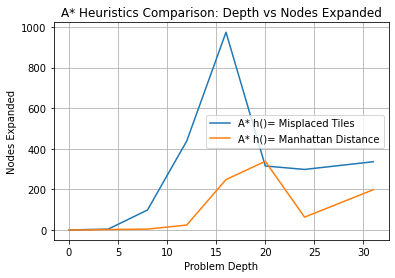

In [67]:
aStarMH,aStarMP, ucs= [], [], []
aStarMH.append(generalSearch(sampleD0,2)[0])
aStarMH.append(generalSearch(sampleD0,2)[0])
aStarMH.append(generalSearch(sampleD2,2)[0])
aStarMH.append(generalSearch(sampleD4,2)[0])
aStarMH.append(generalSearch(sampleD8,2)[0])
aStarMH.append(generalSearch(sampleD12,2)[0])
aStarMH.append(generalSearch(sampleD16,2)[0])
aStarMH.append(generalSearch(sampleD20,2)[0])
aStarMH.append(generalSearch(sampleD24,2)[0])
aStarMH.append(generalSearch(sampleD31,2)[0])
aStarMP.append(generalSearch(sampleD0,1)[0])
aStarMP.append(generalSearch(sampleD2,1)[0])
aStarMP.append(generalSearch(sampleD4,1)[0])
aStarMP.append(generalSearch(sampleD8,1)[0])
aStarMP.append(generalSearch(sampleD12,1)[0])
aStarMP.append(generalSearch(sampleD16,1)[0])
aStarMP.append(generalSearch(sampleD20,1)[0])
aStarMP.append(generalSearch(sampleD24,1)[0])
aStarMP.append(generalSearch(sampleD31,1)[0])



# ucs.append(generalSearch(sampleD0,0)[0])
# ucs.append(generalSearch(sampleD2,0)[0])
# ucs.append(generalSearch(sampleD4,0)[0])
# ucs.append(generalSearch(sampleD8,0)[0])
# ucs.append(generalSearch(sampleD12,0)[0])
# ucs.append(generalSearch(sampleD16,0)[0])
# ucs.append(generalSearch(sampleD20,0)[0])



aStar_df = pd.DataFrame({
   #    'Uniform Cost Search':        [    ucs[0] ,     ucs[1] ,      ucs[2] ,      ucs[3] ,        ucs[4],        ucs[5],      ucs[6]     ] ,
   'A* h()= Misplaced Tiles':    [aStarMP[0], aStarMP[1], aStarMP[2], aStarMP[3], aStarMP[4], aStarMP[5],  aStarMP[6],   aStarMP[7], aStarMP[8] ],
   'A* h()= Manhattan Distance': [aStarMH[0], aStarMH[1], aStarMH[2], aStarMH[3], aStarMH[4], aStarMH[5],  aStarMH[6],   aStarMH[7], aStarMH[8] ],
   }, index=                     [0,          2,          4,          8,          12,         16,              20,       24,         31         ]
   )
aStarGraph = aStar_df.plot.line(title= "A* Heuristics Comparison: Depth vs Nodes Expanded", grid= True)
aStarGraph.set_xlabel("Problem Depth")
aStarGraph.set_ylabel("Nodes Expanded")